In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
!nvidia-smi

Thu Feb  5 02:25:29 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.105.08             Driver Version: 580.105.08     CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             26W /  250W |       3MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            31Gi       1.1Gi        26Gi       2.0Mi       4.0Gi        29Gi
Swap:             0B          0B          0B


In [5]:
import torch.nn as nn

In [6]:
import torch.nn as nn
import torch.optim as optim 

In [7]:
torch.manual_seed(42)
data = torch.randn(100, 1) * 10

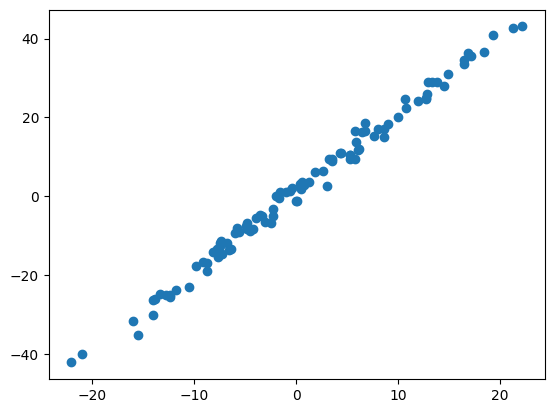

In [8]:
import matplotlib.pyplot as plt

x = data
y = 2 * data + 1+ torch.randn(100, 1) * 2
plt.scatter(x,y)
plt.show()

In [9]:
# 모델 설계 (class 사용, nn.Module로 반환값 받아야함)
class LRModel(nn.Module):
    def __init__(self):
        super(LRModel, self).__init__()
        self.linear = nn.Linear(1,1)
        

    def forward(self, y):
        return self.linear(x)
        

In [10]:
model = LRModel()

In [11]:
model.state_dict().items()

odict_items([('linear.weight', tensor([[0.4801]])), ('linear.bias', tensor([0.8415]))])

In [12]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

In [13]:
epochs = 100
for epoch in range(epochs):
    pred_y = model(x)

    loss = criterion(pred_y, y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(model.state_dict().items())
        print(f"{epoch+1} Loss : {loss.item():.3f}")

odict_items([('linear.weight', tensor([[1.8260]])), ('linear.bias', tensor([0.8543]))])
10 Loss : 7.860
odict_items([('linear.weight', tensor([[1.9830]])), ('linear.bias', tensor([0.8595]))])
20 Loss : 3.230
odict_items([('linear.weight', tensor([[2.0012]])), ('linear.bias', tensor([0.8638]))])
30 Loss : 3.165
odict_items([('linear.weight', tensor([[2.0034]])), ('linear.bias', tensor([0.8679]))])
40 Loss : 3.163
odict_items([('linear.weight', tensor([[2.0036]])), ('linear.bias', tensor([0.8719]))])
50 Loss : 3.161
odict_items([('linear.weight', tensor([[2.0036]])), ('linear.bias', tensor([0.8759]))])
60 Loss : 3.160
odict_items([('linear.weight', tensor([[2.0036]])), ('linear.bias', tensor([0.8797]))])
70 Loss : 3.158
odict_items([('linear.weight', tensor([[2.0035]])), ('linear.bias', tensor([0.8835]))])
80 Loss : 3.157
odict_items([('linear.weight', tensor([[2.0035]])), ('linear.bias', tensor([0.8872]))])
90 Loss : 3.155
odict_items([('linear.weight', tensor([[2.0035]])), ('linear.bia

In [14]:
predict = model(x).detach().numpy()

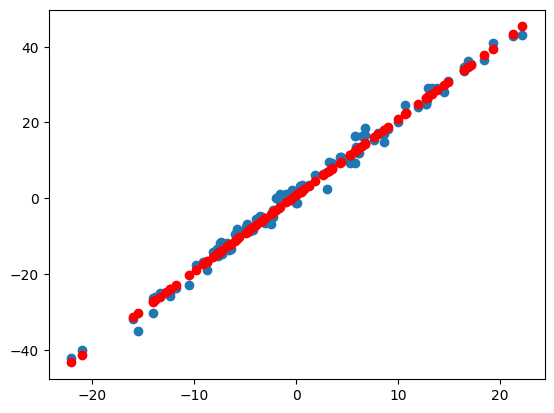

In [15]:
plt.scatter(x.numpy(), y.numpy())
plt.scatter(x.numpy(), predict, color = 'red')

In [16]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 2.8.0+cu126  Device: cuda


In [17]:
from torchvision import transforms, datasets

In [18]:
BATCH_SIZE = 32
EPOCHS = 10
train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)


In [23]:
# 수동 모드
import gzip
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

def load_ubyte_images(filepath):
    with gzip.open(filepath, 'rb') as f:
        # 헤더 읽기 (Magic number, Number of images, Rows, Cols)
        magic, num, rows, cols = np.frombuffer(f.read(16), dtype=np.uint32, count=4).byteswap()
        # 데이터 읽기 및 정규화 (0~255 -> 0~1)
        data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, 1, rows, cols)
        result = data.astype(np.float32)
        return result

def load_ubyte_labels(filepath):
    with gzip.open(filepath, 'rb') as f:
        # 헤더 읽기 (Magic number, Number of items)
        magic, num = np.frombuffer(f.read(8), dtype=np.uint32, count=2).byteswap()
        # 데이터 읽기
        return np.frombuffer(f.read(), dtype=np.uint8).astype(np.int64)

In [20]:
class MNISTManualDataset(Dataset):
    def __init__(self, image_path, label_path, transform=None):
        self.images = torch.from_numpy(load_ubyte_images(image_path))
        self.labels = torch.from_numpy(load_ubyte_labels(label_path))
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label


In [21]:
img_path = './data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz'
lbl_path = './data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz'

# 데이터셋 인스턴스 생성
manual_dataset = MNISTManualDataset(img_path, lbl_path)

# 데이터로더 생성
manual_loader = DataLoader(
    manual_dataset, 
    batch_size=64, 
    shuffle=True
)

# 데이터 확인
images, labels = next(iter(manual_loader))
print(f"Batch Image Shape: {images.shape}") # [64, 1, 28, 28]
print(f"Batch Label Shape: {labels.shape}") # [64]


Batch Image Shape: torch.Size([64, 1, 28, 28])
Batch Label Shape: torch.Size([64])


X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


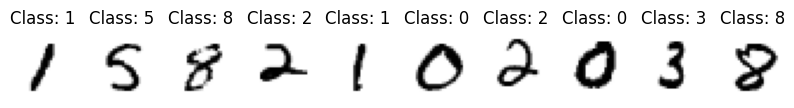

In [22]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break
import matplotlib.pyplot as plt 
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))


In [27]:
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [25]:
DEVICE

device(type='cuda')

In [28]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

In [29]:
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [30]:
from torchinfo import summary
summary(model, input_size=(32, 784))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [32, 10]                  --
├─Linear: 1-1                            [32, 512]                 401,920
├─Linear: 1-2                            [32, 256]                 131,328
├─Linear: 1-3                            [32, 10]                  2,570
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 17.15
Input size (MB): 0.10
Forward/backward pass size (MB): 0.20
Params size (MB): 2.14
Estimated Total Size (MB): 2.44

In [31]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))

In [32]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy


In [33]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.410400
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 2.315822
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 2.277419
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 2.287998
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 2.314970
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 2.300641
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 2.253093
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 2.261493
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 2.249411
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 2.259424

[EPOCH: 1], 	Test Loss: 2.2434, 	Test Accuracy: 31.81 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 2.289786
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 2.247078
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 2.241508
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 2.155414
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 2.030000
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 1.930238
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 1.777141
T